- We define three functions: build_generator, build_discriminator, and build_gan to create the generator, discriminator, and combined GAN model, respectively.
- The generator generates images from random noise (latent space).
- The discriminator is a binary classifier that discriminates between real and fake images.
- The GAN model combines the generator and discriminator. During training, we freeze the discriminator's weights to train only the generator.
- We load and preprocess the MNIST dataset.
- We define parameters like the latent dimension, number of epochs, and batch size.
- We compile the discriminator and GAN models with appropriate loss functions and optimizers.
- In the training loop, we alternate between training the discriminator and the generator. We generate fake images, train the discriminator on a combination of real and fake images, and then train the GAN to generate images that the discriminator classifies as real.
- Finally, we generate some images using the trained generator and visualize them.

In [2]:
#  Build_generator, build_discriminator, and build_gan to create the generator, discriminator, and combined GAN model, respectively.
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Define the Generator
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim, activation='relu'))
    model.add(layers.Dense(784, activation='sigmoid'))
    model.add(layers.Reshape((28, 28)))
    return model

In [3]:
# Define the Discriminator
def build_discriminator():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


In [4]:
# Combine Generator and Discriminator into a GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator during GAN training
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [5]:
# Data loading and preprocessing (in this example, we'll use MNIST dataset as real input)
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255

In [6]:
# Define parameters
latent_dim = 100
epochs = 10000
batch_size = 128

# Build and compile the networks
generator = build_generator(latent_dim)
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gan.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:


# Training loop
for epoch in range(epochs):
    # Train discriminator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_images = generator.predict(noise)
    real_images = train_images[np.random.randint(0, train_images.shape[0], batch_size)]
    X = np.concatenate([real_images, generated_images])
    y = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    discriminator_loss = discriminator.train_on_batch(X, y)

    # Train generator (via GAN)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    y = np.ones((batch_size, 1))
    gan_loss = gan.train_on_batch(noise, y)

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {gan_loss}")

4/4 [==============================] - 0s 4ms/step
Epoch: 0, Discriminator Loss: 0.6934496164321899, Generator Loss: 0.6577754020690918
4/4 [==============================] - 0s 1ms/step
Epoch: 100, Discriminator Loss: 3.6073224544525146, Generator Loss: 0.0014822767116129398
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 200, Discriminator Loss: 4.048094749450684, Generator Loss: 0.0006762506673112512
4/4 [==============================] - 0s 2ms/step
Epoch: 300, Discriminator Loss: 4.268209934234619, Generator Loss: 0.0004530050791800022
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 400, Discriminator Loss: 4.4601030349731445, Generator Loss: 0.0002840199740603566
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 500, Discriminator Loss: 4.5861358642578125, Generator Loss: 0.00021218204346951097
4/4 [==============================] - 0s 2ms/step
Epoch: 600, Discriminator Loss: 4.715188026428223, Generator Loss: 0.00017232194659300148
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 700, Discriminator Loss: 4.840466022491455, Generator Loss: 0.00015805050497874618
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 800, Discriminator Loss: 4.898447036743164, Generator Loss: 0.00011916842777282
4/4 [==============================] - 0s 1ms/step
Epoch: 900, Discriminator Loss: 5.032601356506348, Generator Loss: 9.49281093198806e-05
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 1000, Discriminator Loss: 5.036623477935791, Generator Loss: 9.051672532223165e-05
4/4 [==============================] - 0s 2ms/step
Epoch: 1100, Discriminator Loss: 5.139671325683594, Generator Loss: 7.298750279005617e-05


4/4 [==============================] - 0s 2ms/step
Epoch: 1200, Discriminator Loss: 5.2106170654296875, Generator Loss: 7.036750321276486e-05
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 1300, Discriminator Loss: 5.237656593322754, Generator Loss: 5.814956602989696e-05
4/4 [==============================] - 0s 2ms/step
Epoch: 1400, Discriminator Loss: 5.306881427764893, Generator Loss: 5.367054836824536e-05
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 1500, Discriminator Loss: 5.323556900024414, Generator Loss: 4.987245483789593e-05
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 1600, Discriminator Loss: 5.373361110687256, Generator Loss: 4.165867721894756e-05
4/4 [==============================] - 0s 3ms/step
Epoch: 1700, Discriminator Loss: 5.4282121658325195, Generator Loss: 3.942549301427789e-05
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 1800, Discriminator Loss: 5.47271728515625, Generator Loss: 3.850121720461175e-05
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 1900, Discriminator Loss: 5.523287773132324, Generator Loss: 3.153222496621311e-05
4/4 [==============================] - 0s 2ms/step
Epoch: 2000, Discriminator Loss: 5.589600086212158, Generator Loss: 2.8665357604040764e-05
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 2100, Discriminator Loss: 5.59094762802124, Generator Loss: 2.980244971695356e-05
4/4 [==============================] - 0s 2ms/step
Epoch: 2200, Discriminator Loss: 5.6143598556518555, Generator Loss: 2.6117631932720542e-05
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 2300, Discriminator Loss: 5.661751747131348, Generator Loss: 2.424194462946616e-05
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 2400, Discriminator Loss: 5.745200157165527, Generator Loss: 2.3430384317180142e-05
4/4 [==============================] - 0s 2ms/step
Epoch: 2500, Discriminator Loss: 5.732028007507324, Generator Loss: 2.107243926730007e-05
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 2600, Discriminator Loss: 5.77667236328125, Generator Loss: 1.9610270101111382e-05
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 2700, Discriminator Loss: 5.821942329406738, Generator Loss: 1.9954883100581355e-05
4/4 [==============================] - 0s 1ms/step
Epoch: 2800, Discriminator Loss: 5.856071472167969, Generator Loss: 1.721777516650036e-05
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 2900, Discriminator Loss: 5.858971118927002, Generator Loss: 1.719559440971352e-05
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 3000, Discriminator Loss: 5.89955997467041, Generator Loss: 1.7077858501579612e-05
4/4 [==============================] - 0s 1ms/step
Epoch: 3100, Discriminator Loss: 5.891119956970215, Generator Loss: 1.5783782146172598e-05
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 3200, Discriminator Loss: 5.921772480010986, Generator Loss: 1.447090289730113e-05
4/4 [==============================] - 0s 2ms/step
Epoch: 3300, Discriminator Loss: 5.978403091430664, Generator Loss: 1.3718290574615821e-05
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 3400, Discriminator Loss: 6.022907257080078, Generator Loss: 1.3130016668583266e-05
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 5ms/step
Epoch: 3500, Discriminator Loss: 6.009537696838379, Generator Loss: 1.1327643733238801e-05
4/4 [==============================] - 0s 2ms/step
Epoch: 3600, Discriminator Loss: 6.043818950653076, Generator Loss: 1.1170159268658608e-05
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 3700, Discriminator Loss: 6.0665283203125, Generator Loss: 1.1147307304781862e-05
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 3800, Discriminator Loss: 6.074453353881836, Generator Loss: 1.1276397344772704e-05
4/4 [==============================] - 0s 2ms/step
Epoch: 3900, Discriminator Loss: 6.0902814865112305, Generator Loss: 9.62705507845385e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 4000, Discriminator Loss: 6.112194538116455, Generator Loss: 9.70398832578212e-06
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 4100, Discriminator Loss: 6.167754173278809, Generator Loss: 8.927364433475304e-06
4/4 [==============================] - 0s 3ms/step
Epoch: 4200, Discriminator Loss: 6.13444185256958, Generator Loss: 8.784785677562468e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 4300, Discriminator Loss: 6.203719615936279, Generator Loss: 8.403805622947402e-06
4/4 [==============================] - 0s 3ms/step
Epoch: 4400, Discriminator Loss: 6.274880409240723, Generator Loss: 8.032966434257105e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 4500, Discriminator Loss: 6.23545503616333, Generator Loss: 8.075770892901346e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 4600, Discriminator Loss: 6.249712944030762, Generator Loss: 7.371369520114968e-06
4/4 [==============================] - 0s 3ms/step
Epoch: 4700, Discriminator Loss: 6.285009384155273, Generator Loss: 7.0085484367155004e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 4800, Discriminator Loss: 6.288105010986328, Generator Loss: 6.4106261561391875e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 4900, Discriminator Loss: 6.344113349914551, Generator Loss: 6.751326054654783e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 5000, Discriminator Loss: 6.297025680541992, Generator Loss: 6.17252817392e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 5100, Discriminator Loss: 6.361637592315674, Generator Loss: 6.319851308944635e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 5200, Discriminator Loss: 6.381131172180176, Generator Loss: 5.755289748776704e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 5300, Discriminator Loss: 6.382736682891846, Generator Loss: 5.587874966295203e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 5400, Discriminator Loss: 6.405709266662598, Generator Loss: 5.441829216579208e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 5500, Discriminator Loss: 6.4117279052734375, Generator Loss: 5.236067863734206e-06
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 5600, Discriminator Loss: 6.461277008056641, Generator Loss: 4.999968496122165e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 5700, Discriminator Loss: 6.484902381896973, Generator Loss: 4.8799056457937695e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 5800, Discriminator Loss: 6.503238677978516, Generator Loss: 4.628062924894039e-06
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 5900, Discriminator Loss: 6.517436981201172, Generator Loss: 4.625824658432975e-06
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 6000, Discriminator Loss: 6.505743503570557, Generator Loss: 4.468221959541552e-06
4/4 [==============================] - 0s 3ms/step
Epoch: 6100, Discriminator Loss: 6.513142108917236, Generator Loss: 4.38198730989825e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 6200, Discriminator Loss: 6.575117111206055, Generator Loss: 4.12001372751547e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 6300, Discriminator Loss: 6.570267677307129, Generator Loss: 3.818030563706998e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 6400, Discriminator Loss: 6.612392902374268, Generator Loss: 3.7712807170464657e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 6500, Discriminator Loss: 6.581847667694092, Generator Loss: 3.7700287975894753e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 6600, Discriminator Loss: 6.591200351715088, Generator Loss: 3.681964244606206e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 6700, Discriminator Loss: 6.635651588439941, Generator Loss: 3.4257104744028766e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 6800, Discriminator Loss: 6.647116661071777, Generator Loss: 3.198402282578172e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 6900, Discriminator Loss: 6.645596981048584, Generator Loss: 3.476332494756207e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 7000, Discriminator Loss: 6.690545082092285, Generator Loss: 3.2199855013459455e-06
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 7100, Discriminator Loss: 6.696615219116211, Generator Loss: 3.114444098173408e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 7200, Discriminator Loss: 6.69398307800293, Generator Loss: 2.9120174076524563e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 7300, Discriminator Loss: 6.7091875076293945, Generator Loss: 2.92790923595021e-06
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 7400, Discriminator Loss: 6.721714973449707, Generator Loss: 2.82148675978533e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 7500, Discriminator Loss: 6.762726306915283, Generator Loss: 2.764526925602695e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 7600, Discriminator Loss: 6.770732402801514, Generator Loss: 2.6651655389287043e-06
4/4 [==============================] - 0s 1ms/step
Epoch: 7700, Discriminator Loss: 6.776457786560059, Generator Loss: 2.590282065284555e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 7800, Discriminator Loss: 6.799604892730713, Generator Loss: 2.5324400212412e-06
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 7900, Discriminator Loss: 6.779099941253662, Generator Loss: 2.39480982600071e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 8000, Discriminator Loss: 6.814669132232666, Generator Loss: 2.268737262056675e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 8100, Discriminator Loss: 6.807008743286133, Generator Loss: 2.3748455078020925e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 8200, Discriminator Loss: 6.844773292541504, Generator Loss: 2.2948884179641027e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 8300, Discriminator Loss: 6.88389778137207, Generator Loss: 2.234659405075945e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 8400, Discriminator Loss: 6.863005638122559, Generator Loss: 2.0634408883779543e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 8500, Discriminator Loss: 6.873666286468506, Generator Loss: 2.0889833649562206e-06


4/4 [==============================] - 0s 3ms/step
Epoch: 8600, Discriminator Loss: 6.886513710021973, Generator Loss: 1.9880421859852504e-06
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 8700, Discriminator Loss: 6.902503967285156, Generator Loss: 2.014683559536934e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 8800, Discriminator Loss: 6.904611587524414, Generator Loss: 1.947109012689907e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 8900, Discriminator Loss: 6.947844505310059, Generator Loss: 1.8527592828831985e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 9000, Discriminator Loss: 6.967345714569092, Generator Loss: 1.8453263237461215e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 9100, Discriminator Loss: 6.971977233886719, Generator Loss: 1.7341633338219253e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 9200, Discriminator Loss: 6.969937801361084, Generator Loss: 1.7126558304880746e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 9300, Discriminator Loss: 6.965849876403809, Generator Loss: 1.8538426047598477e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 9400, Discriminator Loss: 6.986050605773926, Generator Loss: 1.6781714293756522e-06
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 9500, Discriminator Loss: 6.971989631652832, Generator Loss: 1.641267317609163e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 9600, Discriminator Loss: 6.994565010070801, Generator Loss: 1.5127001233850024e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 9700, Discriminator Loss: 7.017159461975098, Generator Loss: 1.551043624203885e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 9800, Discriminator Loss: 7.037801742553711, Generator Loss: 1.5495429579459596e-06
4/4 [==============================] - 0s 2ms/step
Epoch: 9900, Discriminator Loss: 7.034832954406738, Generator Loss: 1.5134742170630489e-06
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


1/1 [==============================] - 0s 22ms/step


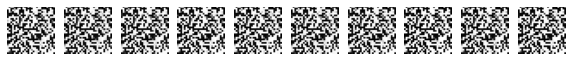

In [9]:
# Generate some images using the trained generator
def generate_images(generator, latent_dim, num_images):
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    generated_images = generator.predict(noise)
    return generated_images

# Example of generating and displaying images
import matplotlib.pyplot as plt

num_generated_images = 10
generated_images = generate_images(generator, latent_dim, num_generated_images)

plt.figure(figsize=(10, 2))
for i in range(num_generated_images):
    plt.subplot(1, num_generated_images, i+1)
    plt.imshow(generated_images[i], cmap='gray')
    plt.axis('off')
plt.show()
